In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# dir = '/content/drive/MyDrive/PokemonData2'

Mounted at /content/drive


In [ ]:
# import os
# import cv2
# import imghdr

# dir = '/content/drive/MyDrive/PokemonData2'

# image_ext = ['jpeg', 'jpg', 'png']


# def saveImage(image, folderPath, fileName, prefix):
#     try:
#         fullpath = os.path.join(folderPath, prefix+fileName)
#         cv2.imwrite(fullpath, image)
#         cv2.waitKey(0)
#         return
#     except Exception as e:
#         print("failed to save"+fullpath)
#         return


# def greyscale(image, folderPath, fileName):
#     print("greyscaling "+fileName)
#     greyscaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     saveImage(greyscaled, folderPath, fileName, "greyscaled_")
#     return


# def flip_horizontally(image, folderPath, fileName):
#     print("flipping horizontally "+fileName)
#     flipped = cv2.flip(image, 1)
#     saveImage(flipped, folderPath, fileName, "flipped_horizontal_")
#     return


# def flip_vertically(image, folderPath, fileName):
#     print("flipping vertically "+fileName)
#     flipped = cv2.flip(image, 0)
#     saveImage(flipped, folderPath, fileName, "flip_vertically_")
#     return


# for folder in os.listdir(dir):
#     folderPath = os.path.join(dir, folder)
    
#     for fileName in os.listdir(folderPath):
#         filePath = os.path.join(folderPath, fileName)
#         tip = imghdr.what(filePath)

#         if tip in image_ext:
#             image = cv2.imread(filePath)
#             greyscale(image, folderPath, fileName)
#             flip_horizontally(image, folderPath, fileName)
#             flip_vertically(image, folderPath, fileName)


Streaming output truncated to the last 5000 lines.
flipping horizontally 82763f20153546da8d6f370b233548a8.jpg
flipping vertically 82763f20153546da8d6f370b233548a8.jpg
greyscaling 65d2d61430564149942f00681c59f787.jpg
flipping horizontally 65d2d61430564149942f00681c59f787.jpg
flipping vertically 65d2d61430564149942f00681c59f787.jpg
greyscaling 7b408a32e7c74641aaff541d88e27290.jpg
flipping horizontally 7b408a32e7c74641aaff541d88e27290.jpg
flipping vertically 7b408a32e7c74641aaff541d88e27290.jpg
greyscaling 71cd620454e84beb8142fd4c7d429851.jpg
flipping horizontally 71cd620454e84beb8142fd4c7d429851.jpg
flipping vertically 71cd620454e84beb8142fd4c7d429851.jpg
greyscaling 7ae90b1ce1784256b89e616c6796b3e3.jpg
flipping horizontally 7ae90b1ce1784256b89e616c6796b3e3.jpg
flipping vertically 7ae90b1ce1784256b89e616c6796b3e3.jpg
greyscaling c519a46ca75f41d89f69afadb6ceffe0.jpg
flipping horizontally c519a46ca75f41d89f69afadb6ceffe0.jpg
flipping vertically c519a46ca75f41d89f69afadb6ceffe0.jpg
greyscal

In [ ]:
# data_dir = '/mnt/data/' 
data_dir = '/content/drive/MyDrive/PokemonData2'

Set variables to reformat img heights and width and set batch size.

In [ ]:
img_height,img_width=300,300
batch_size=32

Create a training dataset with 80% of the data

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7814 files belonging to 150 classes.
Using 6252 files for training.


Create a validation dataset with 20% of the data

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7814 files belonging to 150 classes.
Using 1562 files for validation.


['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

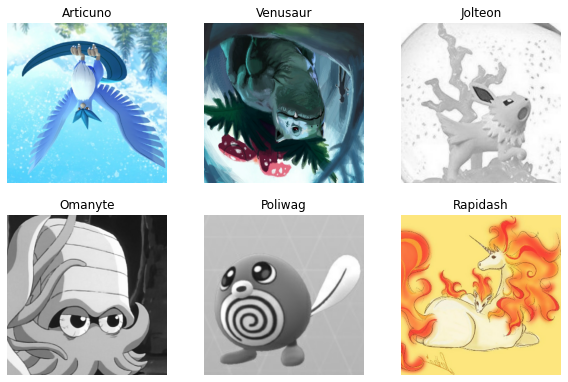

In [ ]:
class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

import pretrained model and output layer (where learning will take place)

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(300,300,3),
                   pooling='avg',classes=150,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(150, activation='softmax'))
resnet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 150)               76950     
                                                                 
Total params: 24,713,750
Trainable params: 1,126,038
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)
resnet_model.save(os.path.join('/results/models','pokemonclassifier.h5'))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


196/196 [==============================] - 2521s 13s/step - loss: 1.0708 - accuracy: 0.7431 - val_loss: 0.2774 - val_accuracy: 0.9257
Epoch 2/10
196/196 [==============================] - 7971s 41s/step - loss: 0.1701 - accuracy: 0.9562 - val_loss: 0.1568 - val_accuracy: 0.9565
Epoch 3/10
196/196 [==============================] - 2528s 13s/step - loss: 0.0727 - accuracy: 0.9819 - val_loss: 0.1079 - val_accuracy: 0.9654
Epoch 4/10
196/196 [==============================] - 2526s 13s/step - loss: 0.0379 - accuracy: 0.9934 - val_loss: 0.0718 - val_accuracy: 0.9808
Epoch 5/10
196/196 [==============================] - 2540s 13s/step - loss: 0.0277 - accuracy: 0.9947 - val_loss: 0.0824 - val_accuracy: 0.9776
Epoch 6/10
196/196 [==============================] - 2443s 12s/step - loss: 0.0328 - accuracy: 0.9936 - val_loss: 0.0687 - val_accuracy: 0.9853
Epoch 7/10
196/196 [==============================] - 2471s 13s/step - loss: 0.0146 - accuracy: 0.9974 - val_loss: 0.0729 - val_accuracy: 0.9

Inference

In [ ]:
from keras.models import load_model
# inference_model = model = load_model('/content/drive/MyDrive/pokemonclassifier.h5')
inference_model = resnet_model

In [ ]:
import cv2
import pathlib
# change inference image location
inference_dir = pathlib.Path(data_dir)
selected_pokemon = list(inference_dir.glob('Lapras/*'))[0]
print(selected_pokemon)
PIL.Image.open(str(selected_pokemon))

image=cv2.imread(str(selected_pokemon))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=inference_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

/content/drive/MyDrive/PokemonData/Lapras/3c87d4a79a3141f5b3d349d9fb1f68a5.jpg
(1, 300, 300, 3)
[[4.18616328e-05 9.99913682e-05 4.06328263e-06 2.20604091e-09
  3.78374098e-05 2.66315283e-06 2.20394014e-07 4.96778102e-06
  5.99362556e-06 8.12690644e-07 1.07138740e-05 3.67818529e-07
  1.18234414e-06 2.92586104e-04 1.81109848e-04 2.68428848e-04
  2.22358198e-04 1.22014162e-05 9.72054186e-05 1.82606127e-05
  4.81293559e-01 9.09710769e-03 1.44877431e-05 3.57457247e-05
  7.57779787e-07 1.62285683e-03 1.30722754e-06 3.44751170e-03
  1.90891209e-04 1.28692508e-01 3.20309715e-04 6.45864382e-03
  7.06333158e-05 1.36180063e-06 1.24719747e-06 8.92685193e-07
  1.31016241e-05 1.85906969e-03 9.20838943e-08 3.44485452e-04
  3.97099386e-04 8.60530872e-06 8.86222173e-04 2.43191926e-06
  7.48805689e-07 5.48713797e-05 5.13492068e-07 4.95478671e-05
  6.41573195e-07 3.36231678e-05 3.09719355e-04 7.10768511e-09
  1.83169107e-07 1.08272870e-04 7.22311146e-04 1.06588404e-05
  1.01670790e-02 3.22658207e-06 1.17